In [44]:
from lxml.html import parse
import numpy as np
from urllib.request import urlopen
import requests,zipfile,io
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
y = input("Enter the year")

Enter the year2004


In [46]:
month=1
for i in range(12):

    if month in range(1,4):qtr = 1; month = "0"+str(month)
    elif month in range(4,7):qtr = 2; month = "0"+str(month)
    elif month in range(7,10): qtr = 3; month = "0"+str(month)
    elif month in range(10,13): qtr = 4
    else :pass
   
   #parsed = parse(urlopen("http://www.sec.gov/dera/data/Public-EDGAR-log-file-data/"+year+"/Qtr"+qtr+"/log"+year+month+"01.zip"))
    r = requests.get("http://www.sec.gov/dera/data/Public-EDGAR-log-file-data/"+y+"/Qtr"+str(qtr)+"/log"+y+str(month)+"01.zip")
   
    z =zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()
   #z
   
   #data = pd.read_csv("log"+y+x+"01.csv")

   #data.head()
   
    month = int(month) + 1

#http://www.sec.gov/dera/data/Public-EDGAR-log-file-data/2003/Qtr2/log20030501.zip

In [47]:
data = pd.read_csv("log20040101.csv")

In [48]:
data.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,24.70.95.bjg,2004-01-01,00:00:00,500.0,771252.0,0001047469-03-042434,a2125426zs-3.htm,200.0,123558.0,0.0,0.0,0.0,10.0,0.0,win
1,64.165.202.fca,2004-01-01,00:00:00,500.0,849778.0,0000927016-03-001282,dex1014.txt,200.0,38688.0,0.0,1.0,0.0,0.0,0.0,win
2,207.168.174.jdd,2004-01-01,00:00:01,500.0,1244190.0,0001244190-03-000001,edgar.xml,200.0,5683.0,0.0,1.0,1.0,0.0,0.0,NaN
3,64.165.202.fca,2004-01-01,00:00:02,500.0,849778.0,0000927016-03-001282,dex1015.txt,200.0,17038.0,0.0,1.0,0.0,0.0,0.0,win
4,64.165.202.fca,2004-01-01,00:00:03,500.0,849778.0,0000927016-03-001282,dex211.htm,200.0,9025.0,0.0,1.0,0.0,0.0,0.0,win


In [49]:
data.isnull().sum()

ip                0
date              0
time              0
zone              0
cik               0
accession         0
extention         0
code              0
size          26466
idx               0
norefer           0
noagent           0
find              0
crawler           0
browser      211839
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440178 entries, 0 to 440177
Data columns (total 15 columns):
ip           440178 non-null object
date         440178 non-null object
time         440178 non-null object
zone         440178 non-null float64
cik          440178 non-null float64
accession    440178 non-null object
extention    440178 non-null object
code         440178 non-null float64
size         413712 non-null float64
idx          440178 non-null float64
norefer      440178 non-null float64
noagent      440178 non-null float64
find         440178 non-null float64
crawler      440178 non-null float64
browser      228339 non-null object
dtypes: float64(9), object(6)
memory usage: 50.4+ MB


In [51]:
data['extention'].value_counts()

-index.htm                    189142
.txt                           80231
.hdr.sgml                      17484
edgar.xml                       9028
primary_doc.xml                 8597
-index.html                     5561
doc4.xml                        3976
edgardoc.xml                    2934
-0001.txt                       2701
xslF345X02/primary_doc.xml      2122
xslF345X02/edgar.xml            1639
xslF345X02/edgardoc.xml         1241
.paper                          1077
-0002.txt                        916
d10q.htm                         732
doc1.xml                         731
xslF345X02/doc4.xml              716
file001.txt                      711
dex991.htm                       596
doc1.txt                         587
d10k.htm                         545
d8k.htm                          540
a4.xml                           466
-0003.txt                        415
edgar123.xml                     389
edgar.htm                        351
file002.txt                      332
d

In [34]:
data['size'].isnull().sum()

26466

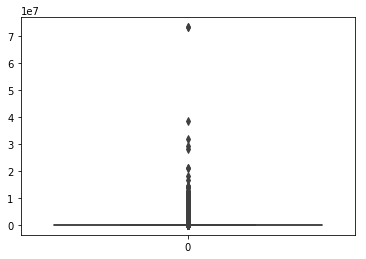

In [35]:
sns.boxplot(data = data['size'])

# Data Cleaning

In [36]:
# Filling Null data in 'size' by mean value

In [37]:
data['size'].fillna(data['size'].mean(), inplace = True)

In [38]:
data['size'].isnull().any()

False

In [39]:
data.isnull().sum()

ip                0
date              0
time              0
zone              0
cik               0
accession         0
extention         0
code              0
size              0
idx               0
norefer           0
noagent           0
find              0
crawler           0
browser      211839
dtype: int64

In [40]:
x=data['browser'].value_counts().max()

In [41]:
data['browser'].value_counts()

win    216624
mie     11324
mac       237
lin       140
opr        13
iem         1
Name: browser, dtype: int64

In [42]:
x=data['browser'].mode()

In [41]:
#most_occuring = x[0]

In [42]:
#most_occuring

'win'

In [19]:
data['browser'].fillna(x[0], inplace = True)

In [20]:
x[0]

'win'

In [21]:
data['browser'].value_counts()

win    428463
mie     11324
mac       237
lin       140
opr        13
iem         1
Name: browser, dtype: int64

In [43]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in ['ip','date','time','accession','extention','browser']:
    data[i] = labelencoder.fit_transform(data[i])
data.head()

TypeError: '<' not supported between instances of 'float' and 'str'

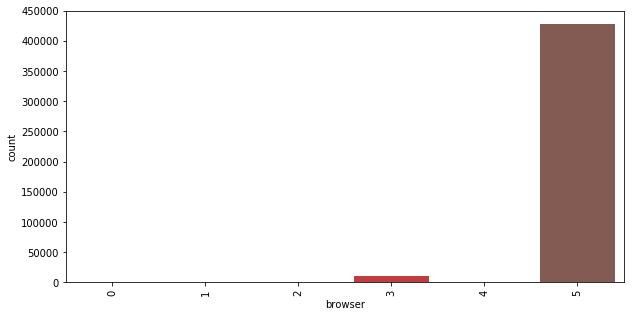

In [23]:
# matplotlib.figure.Figure(figsize= (w,h)) tuple in inches

from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))


# seaborn.countplot - Show the counts of observations in each categorical bin using bars.
# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

sns.countplot(data['browser'])
plt.xticks(rotation = 'vertical')
#plt.title('Manufacturers distribution in dataset')
#plt.ylabel('Number of vehicles')
plt.show()


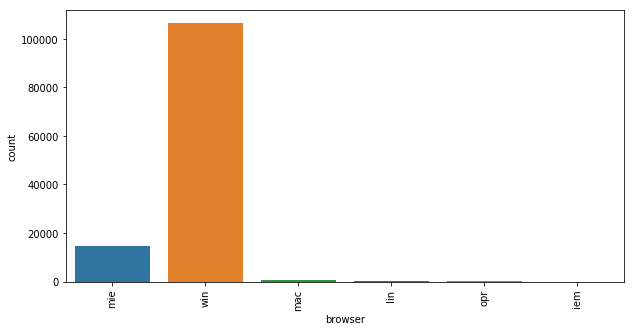

In [73]:
# matplotlib.figure.Figure(figsize= (w,h)) tuple in inches

from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))


# seaborn.countplot - Show the counts of observations in each categorical bin using bars.
# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

sns.countplot(data['browser'])
plt.xticks(rotation = 'vertical')
#plt.title('Manufacturers distribution in dataset')
#plt.ylabel('Number of vehicles')
plt.show()


In [54]:
data1 = pd.read_csv("log20040201.csv")

In [55]:
data1.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,68.186.74.ahg,2004-02-01,00:00:00,500.0,701818.0,0001188112-04-000003,t6k-1458.txt,200.0,3986.0,0.0,0.0,0.0,9.0,0.0,mie
1,128.125.208.cjj,2004-02-01,00:00:01,500.0,701345.0,0000701345-03-000052,group10q.htm,200.0,401981.0,0.0,0.0,0.0,9.0,0.0,win
2,128.255.247.edd,2004-02-01,00:00:01,500.0,700863.0,0000950109-01-500610,ddef14a.htm,200.0,290821.0,0.0,1.0,0.0,0.0,0.0,win
3,68.5.121.eij,2004-02-01,00:00:01,500.0,1021224.0,0001021224-02-000003,richmont.txt,200.0,11019.0,0.0,1.0,0.0,0.0,0.0,win
4,63.137.115.eih,2004-02-01,00:00:02,500.0,1041403.0,0001209191-04-002505,-index.htm,200.0,2994.0,1.0,1.0,0.0,0.0,0.0,win


In [56]:
data1.isnull().sum()

ip               0
date             0
time             0
zone             0
cik              0
accession        0
extention        0
code             0
size         38225
idx              0
norefer          0
noagent          0
find             0
crawler          0
browser      71636
dtype: int64

In [60]:
data1['size'].fillna(data['size'].mean(), inplace = True)

In [61]:
data1.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,68.186.74.ahg,2004-02-01,00:00:00,500.0,701818.0,0001188112-04-000003,t6k-1458.txt,200.0,3986.0,0.0,0.0,0.0,9.0,0.0,mie
1,128.125.208.cjj,2004-02-01,00:00:01,500.0,701345.0,0000701345-03-000052,group10q.htm,200.0,401981.0,0.0,0.0,0.0,9.0,0.0,win
2,128.255.247.edd,2004-02-01,00:00:01,500.0,700863.0,0000950109-01-500610,ddef14a.htm,200.0,290821.0,0.0,1.0,0.0,0.0,0.0,win
3,68.5.121.eij,2004-02-01,00:00:01,500.0,1021224.0,0001021224-02-000003,richmont.txt,200.0,11019.0,0.0,1.0,0.0,0.0,0.0,win
4,63.137.115.eih,2004-02-01,00:00:02,500.0,1041403.0,0001209191-04-002505,-index.htm,200.0,2994.0,1.0,1.0,0.0,0.0,0.0,win


In [62]:
data1.isnull().sum()

ip               0
date             0
time             0
zone             0
cik              0
accession        0
extention        0
code             0
size             0
idx              0
norefer          0
noagent          0
find             0
crawler          0
browser      71636
dtype: int64

In [66]:
data1['browser'].value_counts()

win    106682
mie     14731
mac       456
lin       258
opr        38
iem         1
Name: browser, dtype: int64

In [67]:
x=data1['browser'].mode()

In [68]:
x[0]

'win'

In [69]:
data1['browser'].fillna(x[0], inplace = True)

In [70]:
data1.isnull().sum()

ip           0
date         0
time         0
zone         0
cik          0
accession    0
extention    0
code         0
size         0
idx          0
norefer      0
noagent      0
find         0
crawler      0
browser      0
dtype: int64

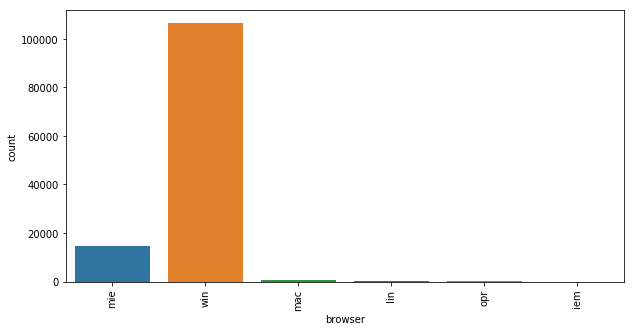

In [71]:
# matplotlib.figure.Figure(figsize= (w,h)) tuple in inches

from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))


# seaborn.countplot - Show the counts of observations in each categorical bin using bars.
# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

sns.countplot(data['browser'])
plt.xticks(rotation = 'vertical')
#plt.title('Manufacturers distribution in dataset')
#plt.ylabel('Number of vehicles')
plt.show()


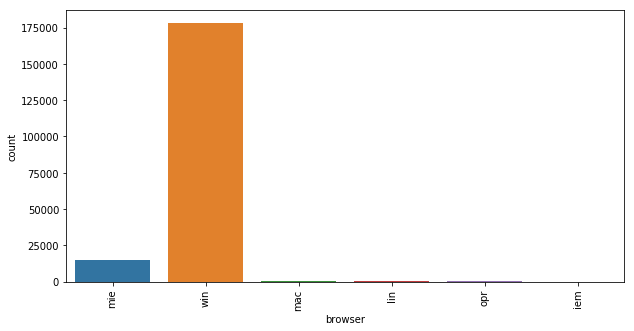

In [72]:
# matplotlib.figure.Figure(figsize= (w,h)) tuple in inches

from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))


# seaborn.countplot - Show the counts of observations in each categorical bin using bars.
# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

sns.countplot(data1['browser'])
plt.xticks(rotation = 'vertical')
#plt.title('Manufacturers distribution in dataset')
#plt.ylabel('Number of vehicles')
plt.show()


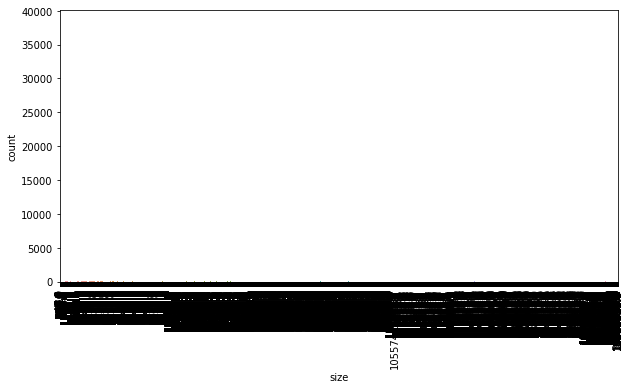

In [77]:
# matplotlib.figure.Figure(figsize= (w,h)) tuple in inches

from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))


# seaborn.countplot - Show the counts of observations in each categorical bin using bars.
# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

sns.countplot(data['size'])
plt.xticks(rotation = 'vertical')
#plt.title('Manufacturers distribution in dataset')
#plt.ylabel('Number of vehicles')
plt.show()


### Correlation Analysis

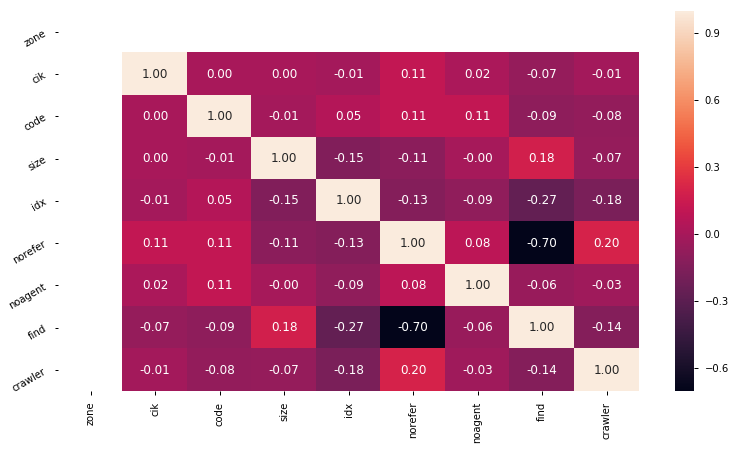

In [78]:
import seaborn as sns
correlation = data.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
